# Assignment 7- Nupoor

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_decision_regions #might need pip/conda install mlxtend

%matplotlib inline


#### 3. Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that dis- plays each of these quantities as a function of pˆm1. The x-axis should display pˆm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.
#### Hint: In a setting with two classes, pˆm1 = 1 − pˆm2. You could make this plot by hand, but it will be much easier to make in R.


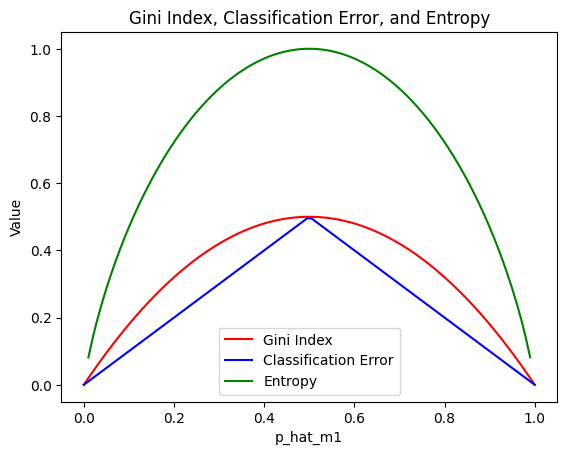

In [4]:
# Define a sequence of p_hat_m1 values ranging from 0 to 1
p_hat_m1 = np.linspace(0, 1, 100)

# Calculate the corresponding p_hat_m2 values
p_hat_m2 = 1 - p_hat_m1

# Calculate Gini index, classification error, and entropy for each p_hat_m1
gini = 2 * p_hat_m1 * p_hat_m2
classification_error = np.minimum(p_hat_m1, p_hat_m2)
entropy = -p_hat_m1 * np.log2(p_hat_m1) - p_hat_m2 * np.log2(p_hat_m2)

# Plot the three quantities against p_hat_m1
plt.plot(p_hat_m1, gini, color='red', label='Gini Index')
plt.plot(p_hat_m1, classification_error, color='blue', label='Classification Error')
plt.plot(p_hat_m1, entropy, color='green', label='Entropy')

# Add labels and legend
plt.xlabel('p_hat_m1')
plt.ylabel('Value')
plt.title('Gini Index, Classification Error, and Entropy')
plt.legend()

# Show plot
plt.show()

In [6]:
import seaborn as sns
sns.set()

from IPython.display import HTML
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


#### 8. In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

##### (a) Split the data set into a training set and a test set.

In [77]:
# Read in the Carseats dataset from the URL
carseats = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')

# Display the head of the data
print(carseats.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print(carseats.dtypes)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


In [79]:
# Define a dictionary mapping the categorical values to numerical values
label_mapping = {'Bad': 1, 'Medium': 2, 'Good': 3}

# Apply label encoding to the 'ShelveLoc' column
carseats['ShelveLoc'] = carseats['ShelveLoc'].map(label_mapping)
label_mapping_us = {'No': 0, 'Yes': 1}
label_mapping_urban = {'No': 0, 'Yes': 1}

# Apply label encoding to the 'US' column
carseats['US'] = carseats['US'].map(label_mapping_us)

# Apply label encoding to the 'Urban' column
carseats['Urban'] = carseats['Urban'].map(label_mapping_urban)

print(carseats.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          1   42   
1  11.22        111      48           16         260     83          3   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          1   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0  


In [80]:
print(carseats.dtypes)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object


In [81]:
# Assuming 'Sales' is the target variable and the rest are features
X = carseats.drop(columns=['Sales'])
y = carseats['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


##### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?


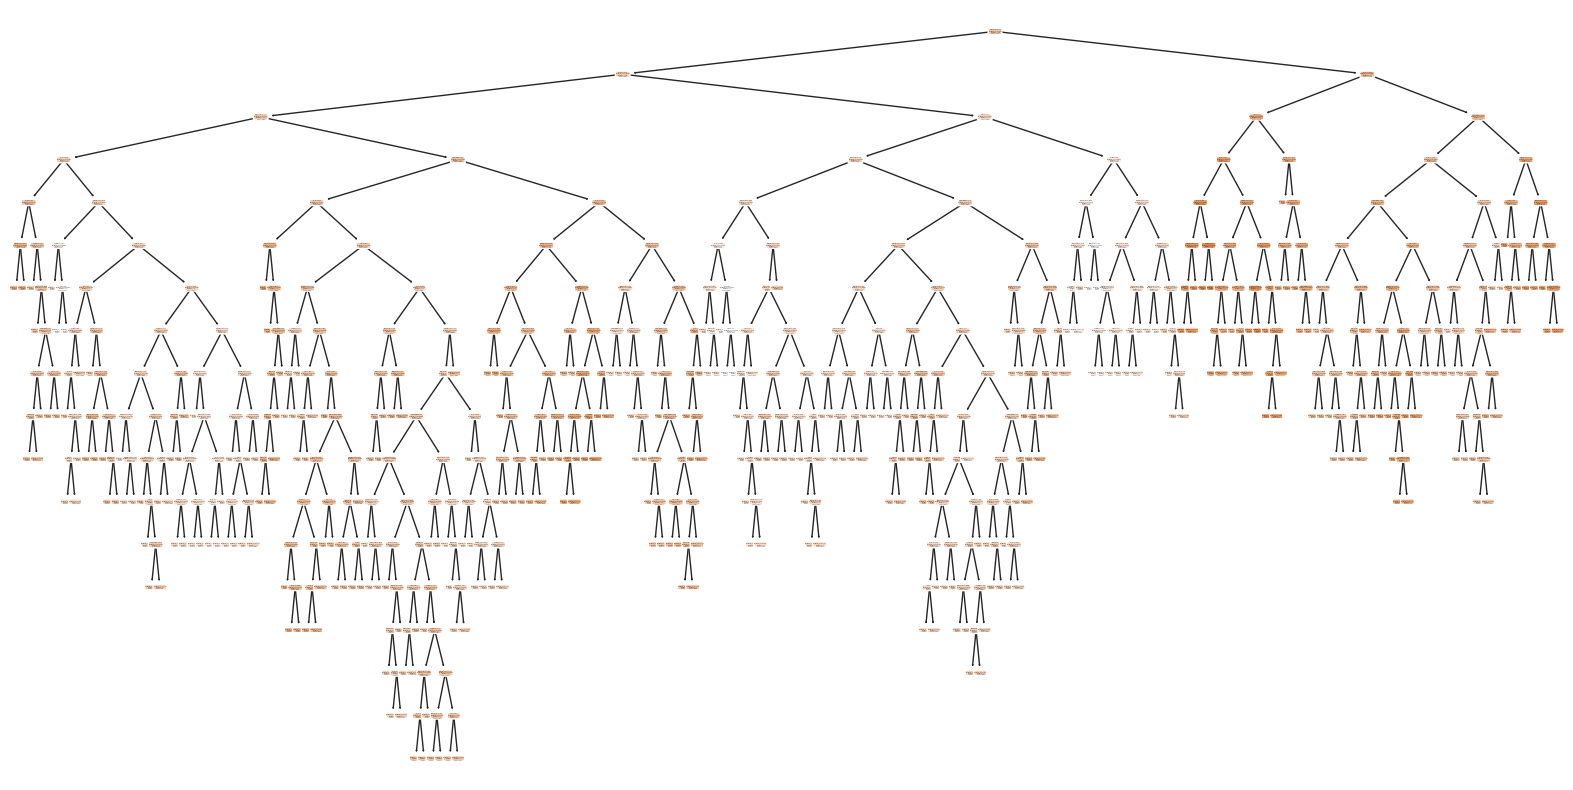

In [82]:
# Fit a regression tree to the training set
tree_reg = DecisionTreeRegressor(random_state=123)
tree_reg.fit(X_train, y_train)

# Convert Index object to a list
feature_names = list(X.columns)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=feature_names, filled=True, rounded=True)
plt.show()

In [83]:
# Make predictions on the testing set
y_pred = tree_reg.predict(X_test)

# Calculate the test MSE
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Test MSE: 7.075426250000001


##### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?


In [84]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of tree depths to test
tree_depths = range(1, 21)

# Initialize lists to store mean test MSE for each tree depth
mean_test_mses = []

# Iterate over each tree depth
for depth in tree_depths:
    # Initialize a decision tree regressor with the current depth
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=123)

    # Perform cross-validation with 5 folds
    # Note: Adjust the number of folds (cv parameter) as needed
    test_mses = -cross_val_score(tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean test MSE for the current tree depth
    mean_test_mse = np.mean(test_mses)

    # Append the mean test MSE to the list
    mean_test_mses.append(mean_test_mse)

# Find the tree depth with the minimum mean test MSE
optimal_depth = tree_depths[np.argmin(mean_test_mses)]
min_mean_test_mse = np.min(mean_test_mses)

# Print the optimal tree depth and the corresponding mean test MSE
print("Optimal Tree Depth:", optimal_depth)
print("Minimum Mean Test MSE:", min_mean_test_mse)


Optimal Tree Depth: 7
Minimum Mean Test MSE: 4.545772689550065


Yes, pruning the tree does improve the test MSE. It has reduced from 7.07 to 4.54

##### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.


In [86]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Initialize a decision tree regressor (or any other base estimator you prefer)
base_estimator = DecisionTreeRegressor(max_depth=optimal_depth, random_state=123)

# Initialize the BaggingRegressor with the base estimator
bagging_reg = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=123)
# Fit the BaggingRegressor to the training data
bagging_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_bagging = bagging_reg.predict(X_test)

# Calculate the test MSE
test_mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print("Test MSE with Bagging:", test_mse_bagging)

# Get feature importances from the BaggingRegressor
feature_importances_bagging = np.mean([tree.feature_importances_ for tree in bagging_reg.estimators_], axis=0)

# Print feature importances
for feature_name, importance in zip(X.columns, feature_importances_bagging):
    print(f"{feature_name}: {importance}")

Test MSE with Bagging: 2.930952381249207
CompPrice: 0.08369004547795403
Income: 0.03603604990300918
Advertising: 0.08691183781590865
Population: 0.02585336583008844
Price: 0.28901528022752965
ShelveLoc: 0.36801442050707034
Age: 0.07870342339128925
Education: 0.024089914767155496
Urban: 0.0034438276664493393
US: 0.004241834413545289


The MSE with bagging regression is 2.93 which is considerably lower than MSE after pruning. The features that were found to be most important are Price, CompPrice, Advertising, Age and Shelveloc which are nearer to 1 as commpared to others. 

##### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.


In [87]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with max_features as 'auto'
rf_reg = RandomForestRegressor(n_estimators=100, max_features=None, random_state=123)

# Fit the RandomForestRegressor to the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_reg.predict(X_test)

# Calculate the test MSE
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Test MSE with Random Forest:", test_mse_rf)

# Get feature importances from the RandomForestRegressor
feature_importances_rf = rf_reg.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, feature_importances_rf):
    print(f"{feature_name}: {importance}")

Test MSE with Random Forest: 2.7842936702500003
CompPrice: 0.08802795689589557
Income: 0.04375845234051735
Advertising: 0.08780640399506119
Population: 0.03311042448227997
Price: 0.27913389490454577
ShelveLoc: 0.34668609657661287
Age: 0.081758946099375
Education: 0.029417617951105847
Urban: 0.004766393658707074
US: 0.005533813095899436


MSE obtained through this is 2.78 which is little lower as compared to Decision Tree MSE which was 2.93. Also, the features that were found to be most important are Price, CompPrice, Advertising, Age and Shelveloc which are nearer to 1 as commpared to others in this as well.


##### (f) Now analyze the data using BART, and report your results.


In [26]:
from ISLP.bart import BART
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
X = carseats.drop(columns=['Sales']).values
y = carseats['Sales'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the BART estimator
bart_model = BART(burnin=5, ndraw=15, random_state=0)

# Fit the model to the training data
bart_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_bart = bart_model.predict(X_test)

# Calculate the test MSE
test_mse_bart = mean_squared_error(y_test, y_pred_bart)
print("Test MSE with BART:", test_mse_bart)

Test MSE with BART: 1.663145349098513


The test MSE with BART is the lowest at 1.66

#### 9. This problem involves the OJ data set which is part of the ISLP package.


##### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


In [52]:
import pandas as pd

# Load the OJ dataset
oj_df = pd.read_csv("https://raw.githubusercontent.com/uu-sml/course-sml-public/master/data/oj.csv")

#set random seed
np.random.seed(1)
train_sample=np.random.choice(np.arange(len(oj_df)),size=800,replace=False)
train=np.asarray([(i in train_sample) for i in oj_df.index])

oj_df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


##### (b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?

In [9]:
!pip install patsy

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [14]:
!pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 2.9 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.51.0-cp312-cp312-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [16]:
pip install seaborn scikit-learn graphviz

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.4.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.4.2-cp312-cp312-macosx_12_0_arm64.whl (10.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.7 MB/s eta 0:00:00
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 3.8 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import patsy as pt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import HTML
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Extract features and labels from the training set
f='Purchase ~ + ' + '+'.join(oj_df.columns.drop(['Purchase']))
y,X = pt.dmatrices(f,oj_df)
y=y[:,0]

#fit tree
clf=tree.DecisionTreeClassifier().fit(X[train],y[train])


In [54]:
#training error rate
1 - clf.score(X[train],y[train])

0.010000000000000009

##### (c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

In [29]:
!pip install --upgrade graphviz

In [11]:
import graphviz

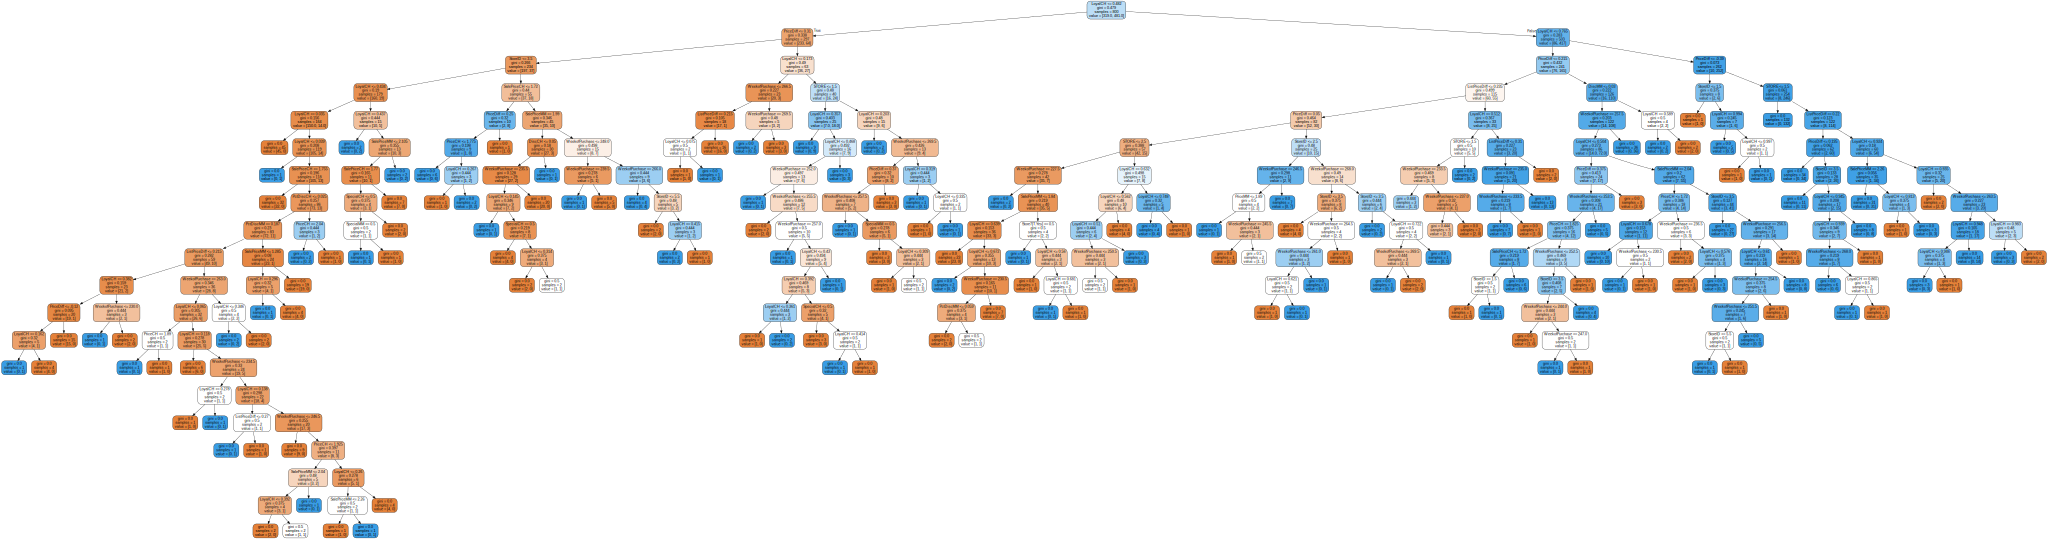

In [24]:
import graphviz
from sklearn.tree import export_graphviz


import os
os.environ["PATH"] += os.pathsep + '/System/Volumes/Data/Users/nupoor/anaconda3/bin/'


# Visualize the tree with GraphViz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.design_info.column_names,
                           filled=True, rounded=True)

# Create the Graphviz source object
graph = graphviz.Source(dot_data, filename='decision_tree_graph', format='pdf', engine='dot')

# Render the graph
graph.render(view=True)

display(graph)

In [40]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 3.7 MB/s eta 0:00:0000:0100:01
Using cached filelock-3.13.4-py3-none-any.whl (11 kB)
Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=b05707bd9cd8e291ad0d5395091dad128f459a655eaf0145071512d47ca49730
  Stored in directory: /Users/nupoor/Library/Caches/pip/wheels/98/f2/3d/290537e0ff7f67aaa647847a10fb5ee5eca305b3c41a774523
Successfully built torchviz


In [26]:

input_size = X_train.shape[1]
print(input_size)

18


In [28]:
clf.tree_.node_count

319

##### (d) Use the export_tree() function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.


In [30]:
from sklearn.tree import export_text

# Use export_text function to produce a text summary of the fitted tree
tree_text = export_text(clf, feature_names=X_train.design_info.column_names)

# Print the text summary of the tree
print(tree_text)


|--- LoyalCH <= 0.48
|   |--- PriceDiff <= 0.31
|   |   |--- StoreID <= 3.50
|   |   |   |--- LoyalCH <= 0.43
|   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- LoyalCH >  0.04
|   |   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- LoyalCH >  0.04
|   |   |   |   |   |   |--- SalePriceCH <= 1.75
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- SalePriceCH >  1.75
|   |   |   |   |   |   |   |--- PctDiscCH <= 0.03
|   |   |   |   |   |   |   |   |--- PctDiscMM <= 0.19
|   |   |   |   |   |   |   |   |   |--- ListPriceDiff <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- LoyalCH <= 0.38
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- LoyalCH >  0.38
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- ListPriceDiff >  0.22
|   |   

This decision tree node is splitting the data based on the value of the feature "LoyalCH" being greater than 0.17. If it's true, it further examines the "STORE" feature. If "STORE" is less than or equal to 1.50, it checks "LoyalCH" again. If "LoyalCH" is less than or equal to 0.36, it classifies the data as 1.0; otherwise, it considers additional conditions involving "WeekofPurchase" and "LoyalCH" values to make a classification. If "LoyalCH" is greater than 0.47, it directly classifies the data as 1.0.

##### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [55]:
pd.DataFrame(confusion_matrix(y[~train],clf.predict(X[~train])), columns = ["PredMM", "PredCH"], index = ["ActualMM", "ActualCH"])

,PredMM,PredCH
ActualMM,73,25
ActualCH,43,129


Following in the test error rate:

In [56]:
#test error rate
1-clf.score(X[~train],y[~train])

0.2518518518518519

##### (f) Use cross-validation on the training set in order to determine the optimal tree size.


In [59]:
results = []
for m in np.arange(2, 40):
    clf = tree.DecisionTreeClassifier(max_depth=m)
    scores = cross_val_score(clf, X[train], y[train], cv=10)
    results += [[m, np.mean(scores)]]



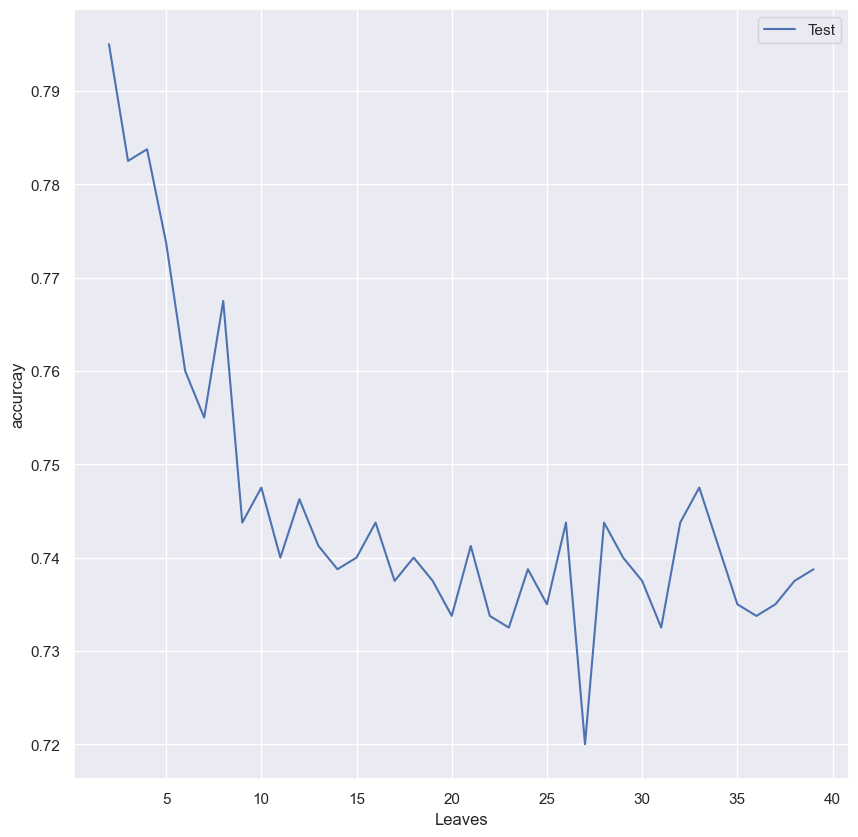

In [60]:
# Plot classification accuracy for each max_depth cv result
plot_df = pd.DataFrame(np.asarray(results), columns=['Leaves','Test']).set_index('Leaves')
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('accurcay');

In [61]:
display(plot_df[plot_df['Test'] == plot_df['Test'].max()])


,Test
Leaves,
2.0,0.795


In [62]:
1- 0.795

0.20499999999999996

##### (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.


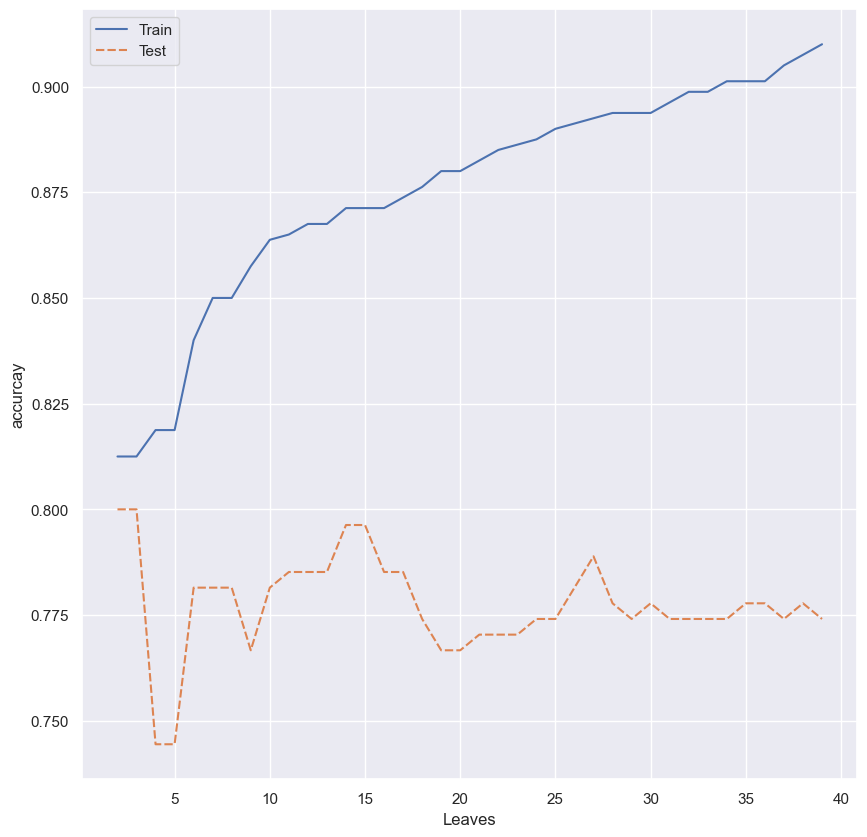

In [63]:
results = []
for mln in np.arange(2, 40):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=mln).fit(X[train],y[train])
    accuracy_train=clf.score(X[train],y[train])
    accuracy_test=clf.score(X[~train],y[~train])
    results += [[mln, accuracy_train, accuracy_test]]

# Plot classification accuracy for each max_leaf_nodes cv result
plot_df = pd.DataFrame(np.asarray(results), columns=['Leaves','Train','Test']).set_index('Leaves')
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('accurcay');

##### (h) Which tree size corresponds to the lowest cross-validated classification error rate?


In [64]:
display(plot_df[plot_df['Test'] == plot_df['Test'].max()])

,Train,Test
Leaves,,
2.0,0.8125,0.8
3.0,0.8125,0.8


2 and 3 tree sizes corresponds to the lowest cross-validation classification error rate.

##### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.


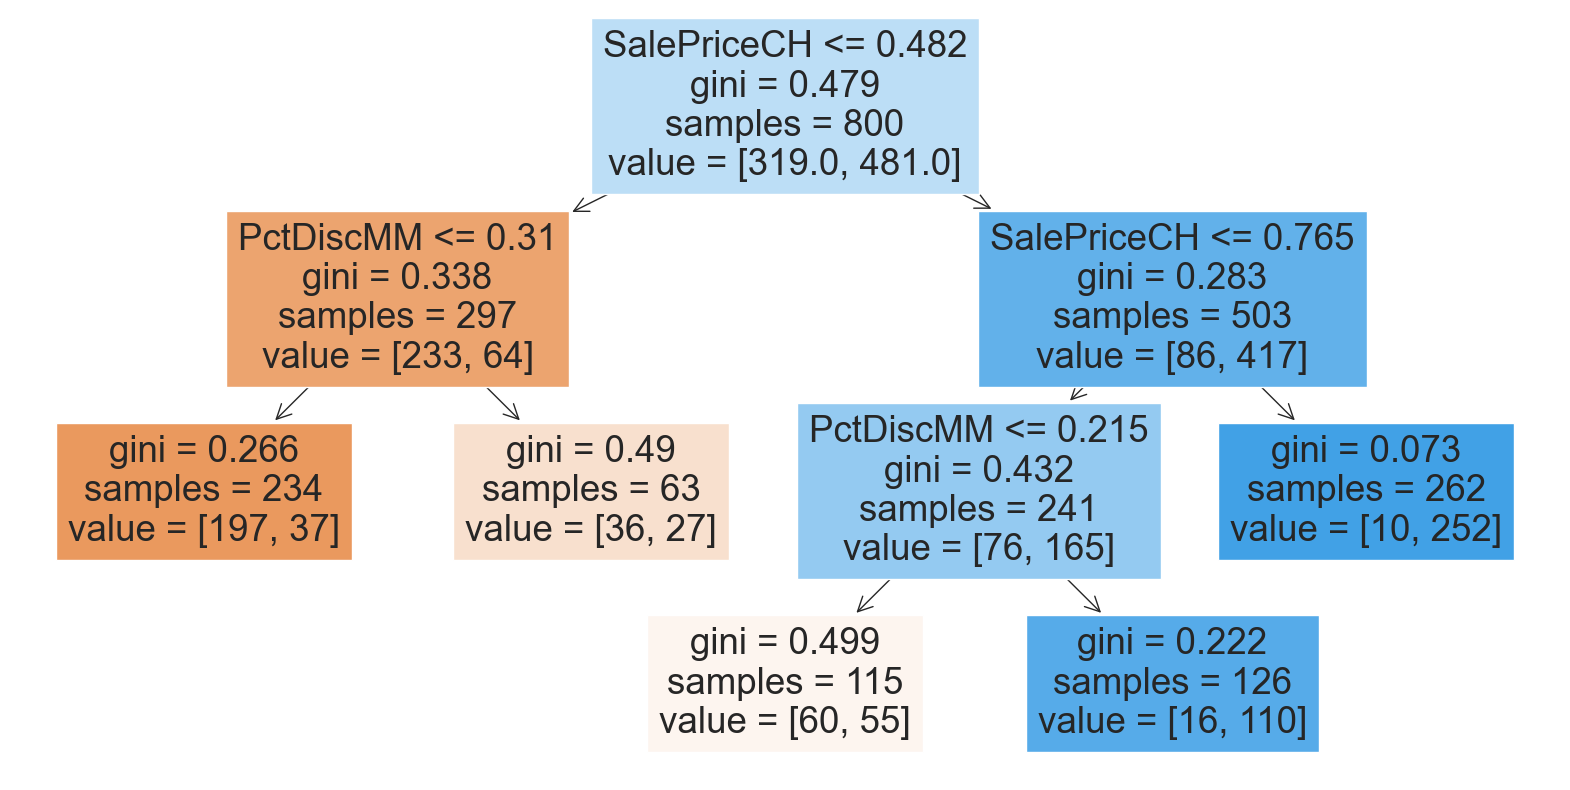

In [67]:
# Convert optimal_tree_size to integer
optimal_tree_size = int(optimal_tree_size)

# Train a decision tree classifier with the optimal max_leaf_nodes
clf_optimal = tree.DecisionTreeClassifier(max_leaf_nodes=optimal_tree_size).fit(X[train], y[train])

# Check if the optimal tree size is pruned
if clf_optimal.tree_.node_count == 2 * clf_optimal.get_params()['max_leaf_nodes'] - 1:
    # If not pruned, manually set max_leaf_nodes to obtain a pruned tree with five terminal nodes
    clf_pruned = tree.DecisionTreeClassifier(max_leaf_nodes=5).fit(X[train], y[train])
else:
    # Use the optimal tree obtained from cross-validation
    clf_pruned = clf_optimal

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_pruned, filled=True, feature_names=train_set.columns.drop(['Purchase']))
plt.show()


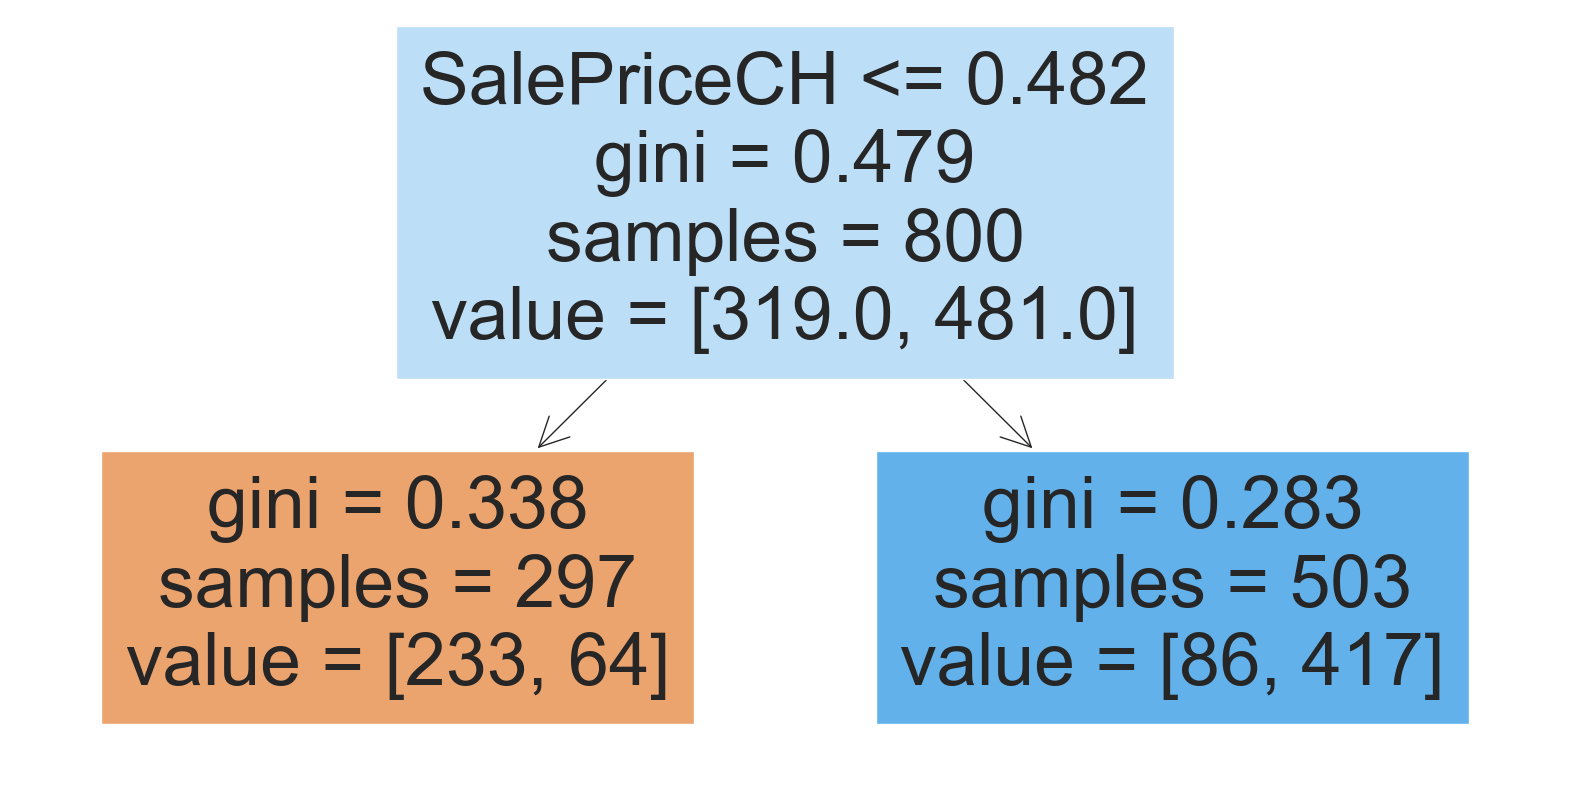

In [74]:
# Convert optimal_tree_size to integer
optimal_tree_size = int(optimal_tree_size)

# Train a decision tree classifier with the optimal max_leaf_nodes
clf_optimal = tree.DecisionTreeClassifier(max_leaf_nodes=optimal_tree_size).fit(X[train], y[train])

# Check if the optimal tree size is pruned
if clf_optimal.tree_.node_count == 3 * clf_optimal.get_params()['max_leaf_nodes'] - 1:
    # If not pruned, manually set max_leaf_nodes to obtain a pruned tree with five terminal nodes
    clf_pruned = tree.DecisionTreeClassifier(max_leaf_nodes=5).fit(X[train], y[train])
else:
    # Use the optimal tree obtained from cross-validation
    clf_pruned = clf_optimal

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_pruned, filled=True, feature_names=train_set.columns.drop(['Purchase']))
plt.show()


(j) Compare the training error rates between the pruned and un- pruned trees. Which is higher?

In [68]:
# Calculate the training error rate for the unpruned tree
training_error_rate_unpruned = 1 - clf.score(X_train, y_train)

# Calculate the training error rate for the pruned tree
training_error_rate_pruned = 1 - clf_pruned.score(X_train, y_train)

print("Training Error Rate (Unpruned):", training_error_rate_unpruned)
print("Training Error Rate (Pruned):", training_error_rate_pruned)


Training Error Rate (Unpruned): 0.08999999999999997
Training Error Rate (Pruned): 0.18125000000000002


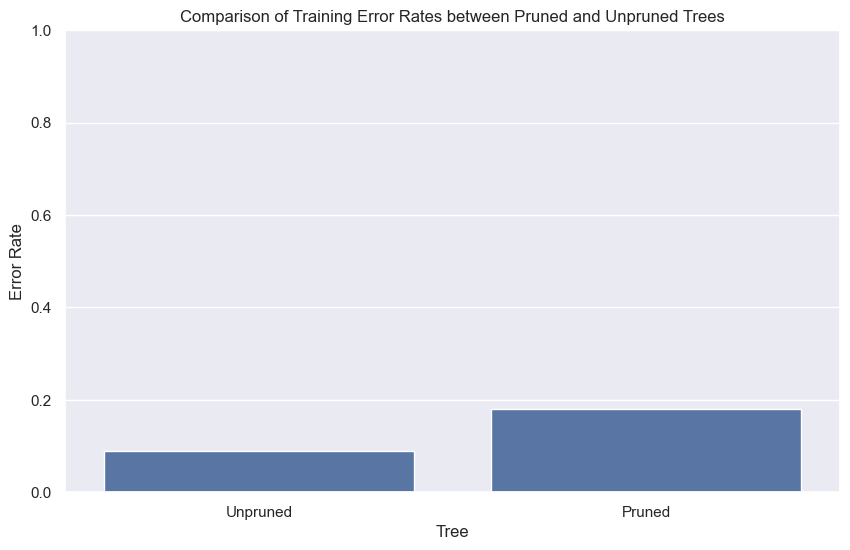

In [69]:
# Calculate error rates
error_rates = [
    ['Unpruned', training_error_rate_unpruned],
    ['Pruned', training_error_rate_pruned]
]

# Create a DataFrame for plotting
plot_df_train = pd.DataFrame(error_rates, columns=['Tree', 'Error Rate'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Tree', y='Error Rate', data=plot_df_train)
plt.title('Comparison of Training Error Rates between Pruned and Unpruned Trees')
plt.xlabel('Tree')
plt.ylabel('Error Rate')
plt.ylim(0, 1)  # Set y-axis limit to range [0, 1]
plt.show()

Training error for pruned test is higher.

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

<Axes: xlabel='test', ylabel='error rate'>

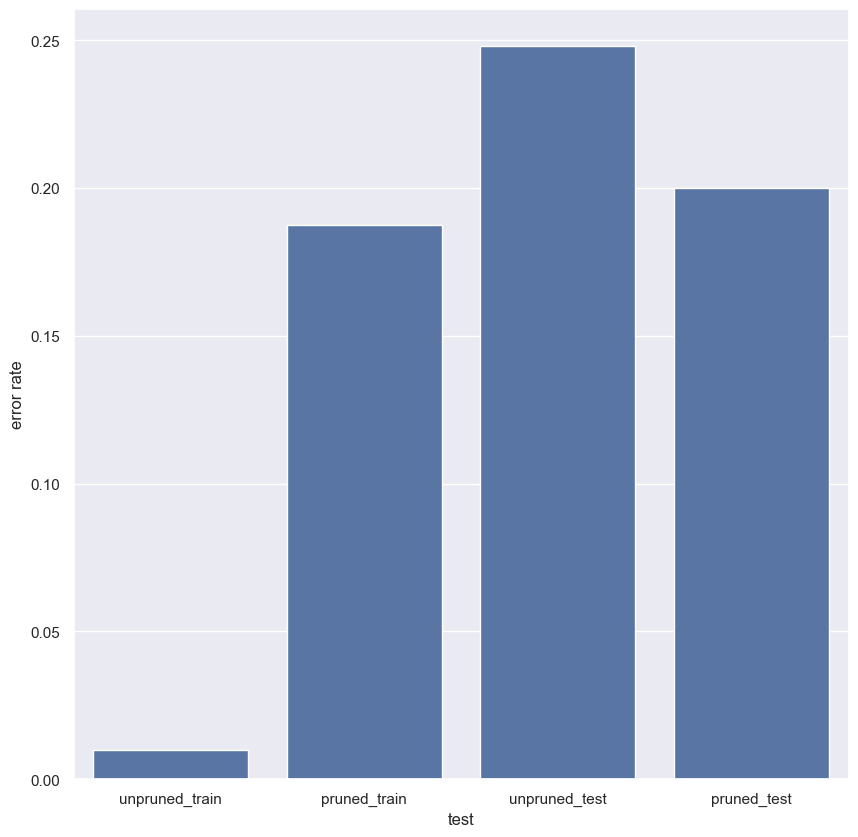

In [72]:


clf_unpruned = tree.DecisionTreeClassifier().fit(X[train],y[train])
clf_pruned = tree.DecisionTreeClassifier(max_leaf_nodes=2).fit(X[train],y[train])

scores=[['unpruned_train', 1-clf_unpruned.score(X[train],y[train])],
        ['pruned_train', 1-clf_pruned.score(X[train],y[train])],
        ['unpruned_test', 1-clf_unpruned.score(X[~train],y[~train])],
        ['pruned_test', 1-clf_pruned.score(X[~train],y[~train])]]

plot_df=pd.DataFrame(scores,columns=['test','error rate'])
plt.figure(figsize=(10,10))
sns.barplot(x='test',y='error rate', data=plot_df)

Test error for unpruned_test is highest.